In [1]:
from load_data import load_CelebA
from benchmark_1N import Benchmark, SearchTemplate, ArcFaceModel
from attack import prepare_attack_data, run_attack

import matplotlib.pyplot as plt 
import numpy as np

## Run with ArcNet as Model and Face Detection Preprocessing

In [ ]:
# load 100% of the dataset, use 10% of the identities as only proxies, holdout 5% for testing attack on non-members
gallery_data, proxy_data, gallery_nonmember_data, gallery_otherimages_data = load_CelebA(0.1, 1., 0.05, max_per_id=10)

Files already downloaded and verified


In [ ]:
version = 'v1'

In [ ]:
model = ArcFaceModel()
benchmark = Benchmark(gallery_data, proxy_data)
# run benchmark for 1:N search without adversarial attack to generate templates once
benchmark.run_benchmark(model, SearchTemplate(), new_version_name=version, verbose=True)

# Current run (no parallelization):
# Enrolled gallery templates in 311.74 mins.
# Enrolled proxy templates in 230.21 mins.
# (Non-adversarial) 1:N search on gallery templates in 0.70 mins.

/usr/local/lib/python3.9/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Enrolling gallery templates...
Enrolled gallery templates in 311.74 mins.
Enrolling proxy temp

/workspaces/face_recognition_privacy_attack/benchmark_1N.py:113: RuntimeWarning: invalid value encountered in divide
  return e / norm(e)


Enrolled proxy templates in 230.21 mins.
Searching for proxy images in gallery...
Search completed in 0.70 mins.


In [ ]:
print(f'FNR at FPR 0.01 {benchmark.get_fnr_at_fpr_top1(0.01)}')
print(f'FNR at FPR 0.05 {benchmark.get_fnr_at_fpr_top1(0.05)}')

FNR at FPR 0.01 0.9403209049982685
FNR at FPR 0.05 0.0668359690638347


In [ ]:
attack_templates, attack_templates_nonmember = prepare_attack_data(gallery_otherimages_data, gallery_nonmember_data, model, n_samples=100)

In [26]:
run_attack(benchmark, attack_templates, attack_templates_nonmember, T_match=0.5, T_accuracy=0.5, fpr_stat_threshold=0.05, load_from_version=version)

Loading gallery templates from version v1...
Loaded gallery templates from version v1 in 0.00 mins.
Loading proxy templates from version v1...
Loaded proxy templates from version v1 in 0.00 mins.
Searching for proxy images in gallery...
Search completed in 1.60 mins.
Loading gallery templates from version v1...
Loaded gallery templates from version v1 in 0.00 mins.
Loading proxy templates from version v1...
Loaded proxy templates from version v1 in 0.00 mins.
Searching for proxy images in gallery...
Search completed in 1.44 mins.
Loading gallery templates from version v1...
Loaded gallery templates from version v1 in 0.00 mins.
Loading proxy templates from version v1...
Loaded proxy templates from version v1 in 0.00 mins.
Searching for proxy images in gallery...


KeyboardInterrupt: 

In [ ]:
fprs = []
tprs = []
for T in np.arange(0, 1., 0.05):
    fpr, tpr = run_attack(benchmark, attack_templates, attack_templates_nonmember, T, load_from_version=version)
    if fpr == 0:
        break
    fprs.append(fpr)
    tprs.append(tpr)

KeyboardInterrupt: 

Text(0, 0.5, 'TPR')

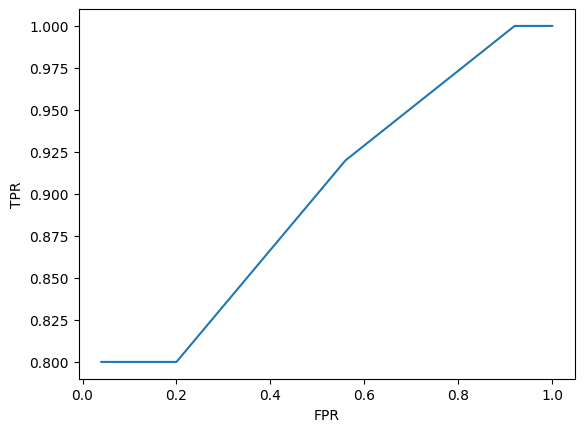

In [ ]:
plt.plot(fprs, tprs)
plt.xlabel('FPR') # Pr[predict member | not member]
plt.ylabel('TPR') # Pr[predict member | member]

In [ ]:
fprs

[np.float64(1.0),
 np.float64(1.0),
 np.float64(0.52),
 np.float64(0.08),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

## Run with FaceNet as model

model = InceptionResnetV1(pretrained='vggface2').eval()
benchmark = Benchmark(gallery_data, proxy_data)
# run benchmark for 1:N search without adversarial attack to generate templates once
benchmark.run_benchmark(model, SearchTemplate(), new_version_name=version, verbose=True)